In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
x=np.linspace(0,499,500)
y=np.sin(x*2*np.pi/50)

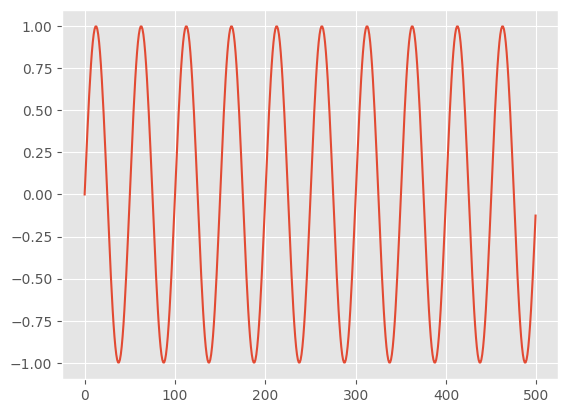

In [ ]:
plt.plot(x,y)

In [ ]:
def make_Sequence_data(y,num_sequence):#LSTMはある一定のシーケンスを持ったデータ出なければ渡せないため
    num_data=len(y)
    seq_data=[]#いくつ刻みか
    target_data=[]#一つ先のデータの保存
    for i in range(num_data-num_sequence):
        seq_data.append(y[i:i+num_sequence])#訓練用データ
        target_data.append(y[i+num_sequence:i+num_sequence+1])#教師用データ
    seq_arr=np.array(seq_data)
    target_arr=np.array(target_data)
    return seq_arr,target_arr

In [ ]:
seq_length=40
y_seq,y_target=make_Sequence_data(y,seq_length)

In [ ]:
y_seq.shape

(460, 40)

In [ ]:
y_target.shape

(460, 1)

In [ ]:
num_test=10
y_seq_train=y_seq[:-num_test]#490個の読込み
y_seq_test=y_seq[-num_test:]#残り10個の読込み
y_target_train=y_target[:-num_test]
y_target_test=y_target[-num_test:]

In [ ]:
y_seq_train

array([[ 0.00000000e+00,  1.25333234e-01,  2.48689887e-01, ...,
        -9.98026728e-01, -9.98026728e-01, -9.82287251e-01],
       [ 1.25333234e-01,  2.48689887e-01,  3.68124553e-01, ...,
        -9.98026728e-01, -9.82287251e-01, -9.51056516e-01],
       [ 2.48689887e-01,  3.68124553e-01,  4.81753674e-01, ...,
        -9.82287251e-01, -9.51056516e-01, -9.04827052e-01],
       ...,
       [-3.68124553e-01, -2.48689887e-01, -1.25333234e-01, ...,
        -9.04827052e-01, -9.51056516e-01, -9.82287251e-01],
       [-2.48689887e-01, -1.25333234e-01, -2.20436424e-15, ...,
        -9.51056516e-01, -9.82287251e-01, -9.98026728e-01],
       [-1.25333234e-01, -2.20436424e-15,  1.25333234e-01, ...,
        -9.82287251e-01, -9.98026728e-01, -9.98026728e-01]])

In [ ]:
y_seq_train.shape

(450, 40)

In [ ]:
y_seq_t=torch.FloatTensor(y_seq_train)

In [ ]:
y_target_t=torch.FloatTensor(y_target_train)

In [ ]:
class LSTM(nn.Module):
    def __init__(self,hidden_size):#hidden_sizeは隠れ層のサイズ
        super().__init__()
        self.hidden_size=hidden_size
        self.lstm=nn.LSTM(input_size=1,hidden_size=self.hidden_size)
        self.linear=nn.Linear(self.hidden_size,1)
    def forward(self,x):
        x,_=self.lstm(x)#シーケンス長を持った出力と隠れ層やセルの状態が出力されるが今回は前者のみ使用する
        x_last=x[-1]#予測された値の最後をとってくる
        x=self.linear(x_last)
        return x

In [ ]:
model=LSTM(100)

In [ ]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
y_seq_t.size()

torch.Size([450, 40])

In [ ]:
y_seq_t=y_seq_t.permute(1,0)#シーケンス長を先にする
y_target_t=y_target_t.permute(1,0)

In [ ]:
y_seq_t.size()

torch.Size([40, 450])

In [ ]:
y_seq_t=y_seq_t.unsqueeze(dim=-1)#最後に入力次元数である1を代入する
y_target_t=y_target_t.unsqueeze(dim=-1)

In [ ]:
y_seq_t.size()

torch.Size([40, 450, 1])

In [ ]:
num_epochs=80
losses=[]
for epoch in range(num_epochs):
    optimizer.zero_grad()#いきなりoptimizerの初期化に入る。今回はバッチ学習のため
    output=model(y_seq_t)
    loss=criterion(output,y_target_t)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    if epoch%10==0:
        print("epoch: {},loss: {}".format(epoch,loss.item()))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 450, 1])) that is different to the input size (torch.Size([450, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0,loss: 0.5192203521728516
epoch: 10,loss: 0.38412776589393616
epoch: 20,loss: 0.22921538352966309
epoch: 30,loss: 0.05999136343598366
epoch: 40,loss: 0.0131816565990448
epoch: 50,loss: 0.00620260601863265
epoch: 60,loss: 0.0024483122397214174
epoch: 70,loss: 0.0013628819724544883


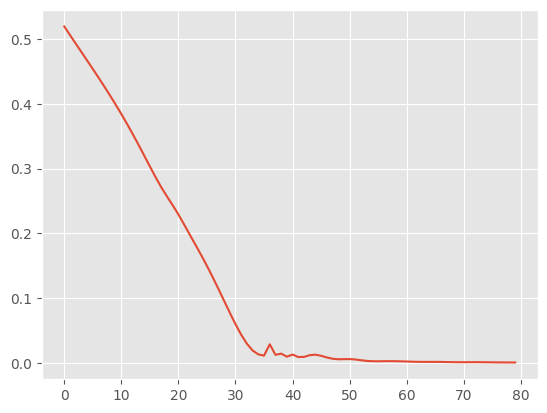

In [ ]:
plt.plot(losses)

In [ ]:
y_seq_test_t=torch.FloatTensor(y_seq_test)
y_seq_test_t=y_seq_test_t.permute(1,0)
y_seq_test_t=y_seq_test_t.unsqueeze(dim=-1)

In [ ]:
y_seq_test_t.shape

torch.Size([40, 10, 1])

In [ ]:
y_seq_test_t.size()

torch.Size([40, 10, 1])

In [ ]:
y_pred=model(y_seq_test_t)

In [ ]:
y_pred.size()

torch.Size([10, 1])

(450.0, 500.0)

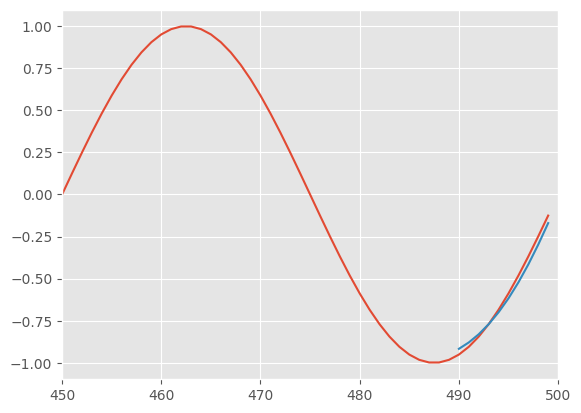

In [ ]:
plt.plot(x,y)
plt.plot(np.arange(490,500),y_pred.detach())
plt.xlim(450,500)